<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#This-file-is-used-to-run-simulations-and-to-save-the-simulation-data" data-toc-modified-id="This-file-is-used-to-run-simulations-and-to-save-the-simulation-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>This file is used to run simulations and to save the simulation data</a></span></li></ul></li><li><span><a href="#Initialisations" data-toc-modified-id="Initialisations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialisations</a></span></li><li><span><a href="#Details-filling" data-toc-modified-id="Details-filling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details filling</a></span></li><li><span><a href="#Write-functions" data-toc-modified-id="Write-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Write functions</a></span><ul class="toc-item"><li><span><a href="#A-Single-Run-without-saving" data-toc-modified-id="A-Single-Run-without-saving-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A Single Run without saving</a></span></li><li><span><a href="#Multiple-Runs-with-saving" data-toc-modified-id="Multiple-Runs-with-saving-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multiple Runs with saving</a></span></li></ul></li></ul></div>

##  This file is used to run simulations and to save the simulation data
What can be saved?

Plots(can be saved for all channels, velocity channels or rest channels)
- density plots
- spatiotemporal property plots


Data
- Spatiotemporal data of node numbers, kappas, thetas
- mean value of theta and kappa

More information in the comments

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lgca import get_lgca
import os

# Initialisations

In [2]:

l = 200  #Number of nodes
rest_channels = 2   #Number of rest channels
n_channels = rest_channels + 2
tmax = 600   #number of generations to simulate

nodesFull = 10   #Here you select how many nodes to fill INITIALLY

nodes = 1 + np.arange(n_channels*l, dtype=np.uint).reshape((l, n_channels))
nodes[nodesFull:,:] = 0   #the leftmost "nodesFull" nodes are filled and the rest are set to zero.

print(nodes.shape)

(20, 4)


In [3]:
#you can use this list to access simulation parameters easily. The first string is the unique simulation ID you provide for a unique set of parameters
#You use this ID to identify what are the parameters used for a particular simulation,
#The next four values are: minKappa, maxKappa, minTheta, maxTheta
InitialiserList = {'1':['0030s',3.0,4.0,0.0,1.0,5],\
                   '2':['0031s',-4.0, -3.0, 0.0, 1.0,5],\
                   '3':['0032s',-4.0, -3.0, 0.0, 0.1,5],\
                   '4':['0033s',-4.0, -3.0, 0.9, 1.0,5],\
                   '5':['0034s' ,3.0, 4.0, 0.9, 1.0,5],\
                  '6':['0035s' ,3.0, 4.0, 0.0,0.1,5],\
                  '7':['0036s' ,-4.0,4.0,0.0,0.1,5], \
                  '8':['0037s' ,-4.0, 4.0, 0.9, 1.0,5],\
                   '9':['0038s' ,-4.0, 4.0, 0.0, 1.0,5]}

In [4]:

expID = '9'
min_kappa, max_kappa = InitialiserList[expID][1], InitialiserList[expID][2]
min_theta, max_theta = InitialiserList[expID][3], InitialiserList[expID][4]


"""
#Each node has the same kappa and theta
kappa = (np.repeat(np.arange(nodesFull), n_channels))*(max_kappa-min_kappa)/(nodesFull-1)+min_kappa 
theta = (np.repeat(np.arange(nodesFull), n_channels))*(max_theta-min_theta)/(nodesFull-1)+min_theta 
"""


#intialising kappa and theta with uniform value distribution but random spatial distribution
#for e.g if you need 11 cells initially and your min kappa is 1 and max kappa is 2, then
#first you generate a uniform set of kappa values: 1.0,1.1,1.2,....,2.0. Then you randomly shuffle these kappa numbers and assign it to cells
#this is to ensure that you are not inducing a bias in the initial spatial distribution of kappa and theta. Ofcourse, you might require multiple runs to 
#make sure there is no bias. 
kappa = ((np.arange(nodesFull * n_channels))*(max_kappa-min_kappa)/(nodesFull*n_channels-1)+min_kappa) 
np.random.shuffle(kappa)
theta = ((np.arange(nodesFull * n_channels))*(max_theta-min_theta)/(nodesFull*n_channels-1)+min_theta) 
np.random.shuffle(theta)

"""
#intialising kappa and theta with uniform valeu distribution but random spatial distribution
newkappa = ((np.arange(nodesFull * n_channels))*(max_kappa-min_kappa)/(nodesFull*n_channels-1)+min_kappa) 
newtheta = ((np.arange(nodesFull * n_channels))*(max_theta-min_theta)/(nodesFull*n_channels-1)+min_theta) 
if(initial_density == 0.5):
    kappa = newkappa[:int(nodesFull*n_channels/2)]
    theta = newtheta[:int(nodesFull*n_channels/2)]
    nodes[nodesFull:, 2:] = 0

np.random.shuffle(kappa)
np.random.shuffle(theta)"""

'\n#intialising kappa and theta with uniform valeu distribution but random spatial distribution\nnewkappa = ((np.arange(nodesFull * n_channels))*(max_kappa-min_kappa)/(nodesFull*n_channels-1)+min_kappa) \nnewtheta = ((np.arange(nodesFull * n_channels))*(max_theta-min_theta)/(nodesFull*n_channels-1)+min_theta) \nif(initial_density == 0.5):\n    kappa = newkappa[:int(nodesFull*n_channels/2)]\n    theta = newtheta[:int(nodesFull*n_channels/2)]\n    nodes[nodesFull:, 2:] = 0\n\nnp.random.shuffle(kappa)\nnp.random.shuffle(theta)'

# Details filling

In [5]:
#here you generate a text file which saves all the information about the parameters, lattice dimensions, ,,etc.
#Make sure this region is properly checked before you run any simulation. This is because, this text file will be used
#to refer the simulation details in the future. Any mistakes here would mean that all information about the simulation conditions are lost.
"""

"""
str1 = '1D Simulation with ' + str(l) + " nodes, and " + str(n_channels) + " channels" + "********"
str2 = 'Time: ' + str(tmax)+ "********"
str3 = 'Nodes Filled: ' + str(nodesFull)+ "********"
str4 = "Kappa and Theta are randomly shuffled"+ "********"
str5 = "kapmin, kapmax, thetamin, thetamax [" + str(min_kappa) + "," + str(max_kappa) + "," + \
str(min_theta) + "," + str(max_theta) + "]" + "********"
str6 = "kap standard deviation = 0.0, theta standard deviation = 0.0 ***********"
str7 = "Rest Channels = " + str(rest_channels) + "********"
str8 = "Birth Rate = 0.2"
simulInfo = str1+str2+str3+str4+str5+str6+str7

strID = InitialiserList[expID][0]
infoFile1 = open(strID + ".txt", 'w')
for L in [str1, str2, str3, str4, str5, str6, str7]:
    infoFile1.writelines(L) 
infoFile1.close()

# Write functions

In [6]:
#A function to the property values for every timestep
def WritePropertyTime(propArray, propertyName, fileHeader=""):
    fileTitle = propertyName + '.csv'
    a = np.savetxt(fileTitle, propArray, header=fileHeader, delimiter = ', ', fmt='%-7.9f')

In [7]:
#A function to the property values for every timestep from a given start time
def WritePropertyTimeFrom(propArray, propertyName, timeToStart, fileHeader=""):
    #timeToStart is the time from which we write property values. For e.g. if it is 5900. Then we save from 5900 till the end
    fileTitle = propertyName + '.csv'
    a = np.savetxt(fileTitle, propArray[timeToStart:,:], header=fileHeader, delimiter = ', ', fmt='%-7.9f')

In [8]:
#A function to the property values for every "timeJump"th timestep. This might be useful to save storage space. 
def WritePropertyTimeStaggered(propArray, propertyName, timeJump, fileHeader=""):
    #timeJump is the time gap where we record prop values For e.g. if it is 100. Then we save every 100th step
    fileTitle = propertyName + '.csv'
    a = np.savetxt(fileTitle, propArray[::timeJump,:], header=fileHeader, delimiter = ', ', fmt='%-7.9f')

In [10]:
#A function to the property values for last timestep
def WritePropertyFinal(propArray, propertyName, l, tmax, n_channels, ini_kappa, ini_theta, InitialCondition='First Node Full'):
    fileTitle = 'final' + propertyName + ('%.5f' % ini_kappa) + ('%.5f' % ini_theta) + '.csv'
    fileHeader = header
    a = np.savetxt(fileTitle, propArray, header=fileHeader, delimiter = ', ', fmt='%-7.9f')


In [11]:

def WritePropertyMean(propArray, propertyName):
    fileTitle = propertyName + '.csv'
    a = np.savetxt(fileTitle, propArray, delimiter=', ', fmt='%-7.9f')

## A Single Run 
This codeblock is used to run the simulation only once. Use the next codeblock if you wish to have multiple runs

In [ ]:
lgca1 = get_lgca(ib=True, geometry = 'lin', bc = 'refl', interaction='go_or_grow', kappa=kappa, theta=theta, r_b=0.2, r_d=0.01, nodes=nodes, shift_nodes_left=True)
lgca1.timeevo(timesteps=tmax, record=True, recordProp=True, recordN = True, recordPropMean=False)
plt.figure()
lgca1.plot_density()
plt.savefig(strID + "density.jpg")
plt.figure()
lgca1.plot_density_channel(channel='velocity')
plt.savefig(strID + "densityVelocity.jpg")
plt.figure()
lgca1.plot_density_channel(channel='rest')
plt.savefig(strID + "densityRest.jpg")
plt.figure()
lgca1.plot_prop_timecourse(propname='kappa')
plt.savefig(strID + "meankappavariation.jpg")
plt.figure()
lgca1.plot_prop_timecourse(propname='theta')
plt.savefig(strID + "meanthetavariation.jpg")
plt.figure()
lgca1.plot_prop_spatial()
plt.savefig(strID + "kappaSpatial.jpg")
plt.figure()
lgca1.plot_prop_spatial(channeltype='velocity')
plt.savefig(strID + "kappaSpatialVelocity.jpg")
plt.figure()
lgca1.plot_prop_spatial(channeltype='rest')
plt.savefig(strID + 'kappaSpatialRest.jpg')
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta')
plt.savefig(strID + "thetaSpatial.jpg")
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='velocity')
plt.savefig(strID + "thetaSpatialVelocity.jpg")
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='rest')
plt.savefig(strID + 'thetaSpatialRest.jpg')

plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='first')
plt.savefig(strID + "thetaSpatialFirst.jpg")
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='second')
plt.savefig(strID + 'thetaSpatialSecond.jpg')
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='third')
plt.savefig(strID + "thetaSpatialThird.jpg")
plt.figure()
lgca1.plot_prop_spatial(propname = 'theta', channeltype='fourth')
plt.savefig(strID + 'thetaSpatialFourth.jpg')


kappa_t = lgca1.propkappa_t.reshape(tmax+1, l*n_channels, order='F')
theta_t = lgca1.proptheta_t.reshape(tmax+1, l*n_channels, order='F')
nodes_t = lgca1.nodes_t.reshape(tmax+1, l*n_channels, order='F')

#Writing values to files
WritePropertyTimeFrom(kappa_t, "Evolution of Kappa from", tmax-100, simulInfo)
WritePropertyTimeStaggered(kappa_t, "Evolution of Kappa staggered", 20, simulInfo)
WritePropertyMean(lgca1.kappa_mean_t, 'Kappa Mean')
WritePropertyMean(lgca1.theta_mean_t, 'Theta Mean')
WritePropertyMean(lgca1.kappa_mean_vel_t, 'Kappa Mean Vel')
WritePropertyMean(lgca1.theta_mean_vel_t, 'Theta Mean Vel')
WritePropertyMean(lgca1.kappa_mean_rest_t, 'Kappa Mean Rest')
WritePropertyMean(lgca1.theta_mean_rest_t, 'Theta Mean Rest')
WritePropertyMean(lgca1.n_t, 'Nodes Filled')
WritePropertyMean(lgca1.n_vel_t, 'Velocity Nodes Filled')
WritePropertyMean(lgca1.n_rest_t, 'Rest Nodes Filled')

## Multiple Runs with saving

In [13]:
Runs = 5

standard deviation set to =  0.01
[3.5897435897435894, -1.3333333333333335, -0.3076923076923075, -1.948717948717949, -3.3846153846153846, 2.153846153846154, 2.564102564102564, -2.9743589743589745, 0.1025641025641022, 3.384615384615385, -2.1538461538461537, -0.10256410256410264, -2.358974358974359, -0.9230769230769229, -4.0, 0.7179487179487181, -0.7179487179487181, 1.1282051282051286, 0.3076923076923075, -2.564102564102564, -3.58974358974359, 1.333333333333333, 3.1794871794871797, 1.7435897435897436, 2.769230769230769, 1.5384615384615383, 4.0, 0.5128205128205128, 0.9230769230769234, 1.948717948717949, -2.769230769230769, -1.5384615384615383, 2.3589743589743586, 3.7948717948717947, 2.9743589743589745, -0.5128205128205128, -3.7948717948717947, -3.1794871794871797, -1.1282051282051282, -1.7435897435897436]
Progress: [####################] 100% Done...
(6001, 20)
standard deviation set to =  0.01
[3.5897435897435894, -1.3333333333333335, -0.3076923076923075, -1.948717948717949, -3.384615384

/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

standard deviation set to =  0.01
[3.5897435897435894, -1.3333333333333335, -0.3076923076923075, -1.948717948717949, -3.3846153846153846, 2.153846153846154, 2.564102564102564, -2.9743589743589745, 0.1025641025641022, 3.384615384615385, -2.1538461538461537, -0.10256410256410264, -2.358974358974359, -0.9230769230769229, -4.0, 0.7179487179487181, -0.7179487179487181, 1.1282051282051286, 0.3076923076923075, -2.564102564102564, -3.58974358974359, 1.333333333333333, 3.1794871794871797, 1.7435897435897436, 2.769230769230769, 1.5384615384615383, 4.0, 0.5128205128205128, 0.9230769230769234, 1.948717948717949, -2.769230769230769, -1.5384615384615383, 2.3589743589743586, 3.7948717948717947, 2.9743589743589745, -0.5128205128205128, -3.7948717948717947, -3.1794871794871797, -1.1282051282051282, -1.7435897435897436]
Progress: [####################] 100% Done...
(6001, 20)


/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

standard deviation set to =  0.01
[3.5897435897435894, -1.3333333333333335, -0.3076923076923075, -1.948717948717949, -3.3846153846153846, 2.153846153846154, 2.564102564102564, -2.9743589743589745, 0.1025641025641022, 3.384615384615385, -2.1538461538461537, -0.10256410256410264, -2.358974358974359, -0.9230769230769229, -4.0, 0.7179487179487181, -0.7179487179487181, 1.1282051282051286, 0.3076923076923075, -2.564102564102564, -3.58974358974359, 1.333333333333333, 3.1794871794871797, 1.7435897435897436, 2.769230769230769, 1.5384615384615383, 4.0, 0.5128205128205128, 0.9230769230769234, 1.948717948717949, -2.769230769230769, -1.5384615384615383, 2.3589743589743586, 3.7948717948717947, 2.9743589743589745, -0.5128205128205128, -3.7948717948717947, -3.1794871794871797, -1.1282051282051282, -1.7435897435897436]
Progress: [####################] 100% Done...
(6001, 20)


/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

standard deviation set to =  0.01
[3.5897435897435894, -1.3333333333333335, -0.3076923076923075, -1.948717948717949, -3.3846153846153846, 2.153846153846154, 2.564102564102564, -2.9743589743589745, 0.1025641025641022, 3.384615384615385, -2.1538461538461537, -0.10256410256410264, -2.358974358974359, -0.9230769230769229, -4.0, 0.7179487179487181, -0.7179487179487181, 1.1282051282051286, 0.3076923076923075, -2.564102564102564, -3.58974358974359, 1.333333333333333, 3.1794871794871797, 1.7435897435897436, 2.769230769230769, 1.5384615384615383, 4.0, 0.5128205128205128, 0.9230769230769234, 1.948717948717949, -2.769230769230769, -1.5384615384615383, 2.3589743589743586, 3.7948717948717947, 2.9743589743589745, -0.5128205128205128, -3.7948717948717947, -3.1794871794871797, -1.1282051282051282, -1.7435897435897436]
Progress: [####################] 100% Done...
(6001, 20)


/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

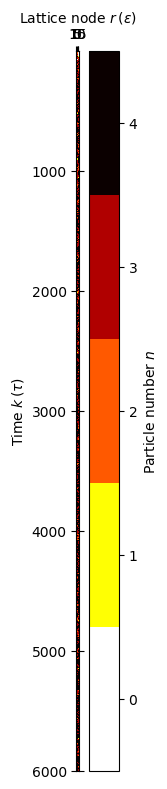

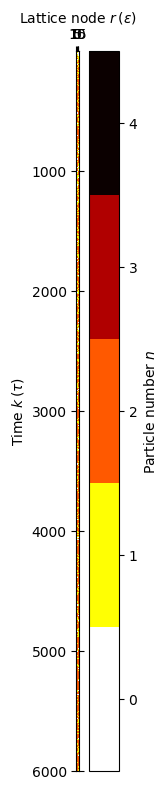

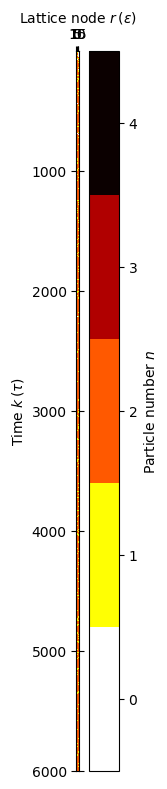

<Figure size 640x480 with 0 Axes>

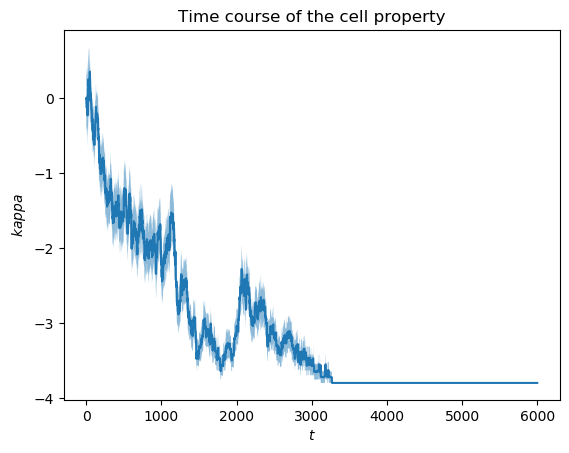

<Figure size 640x480 with 0 Axes>

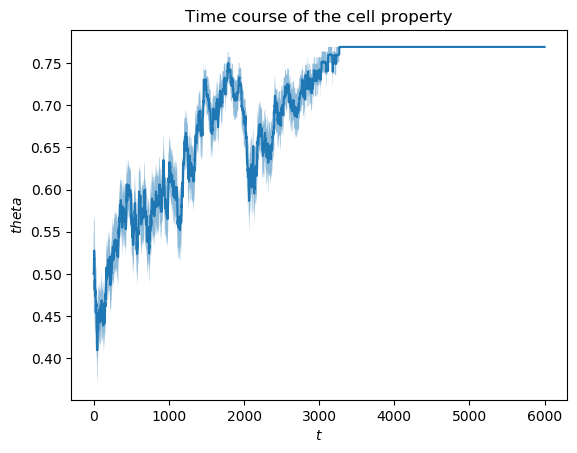

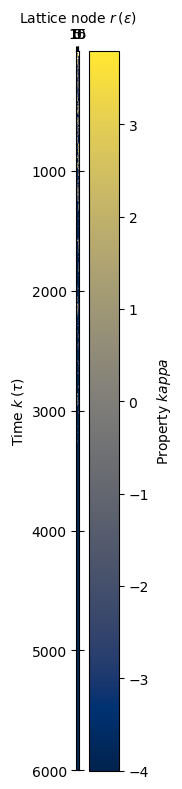

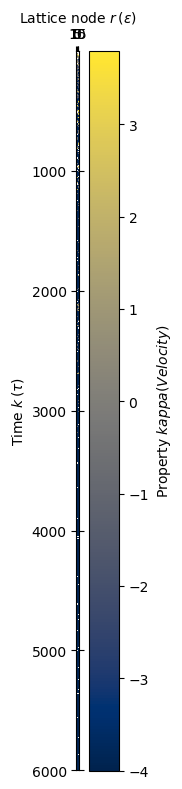

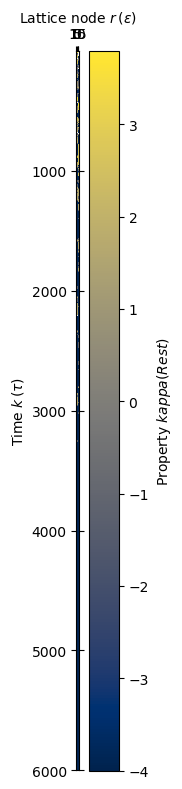

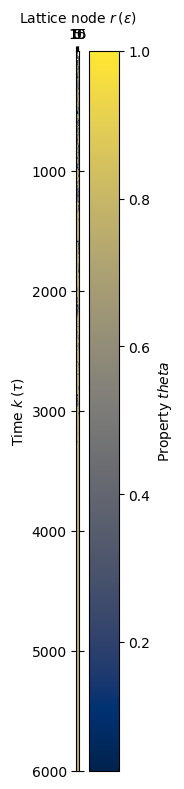

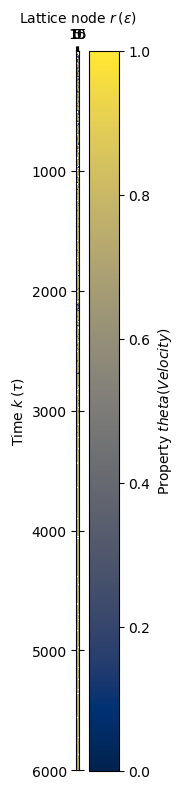

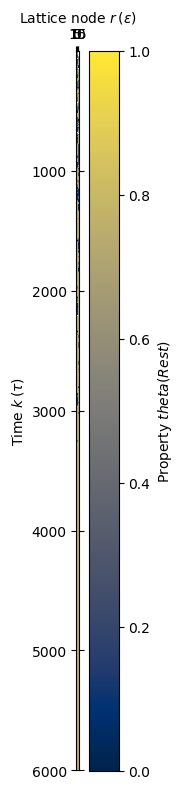

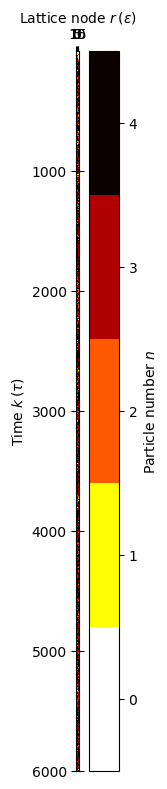

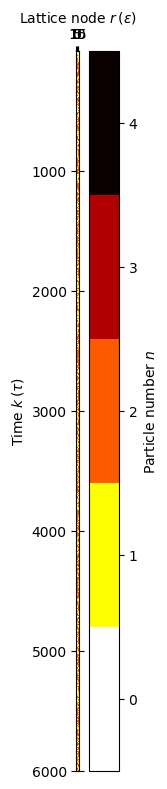

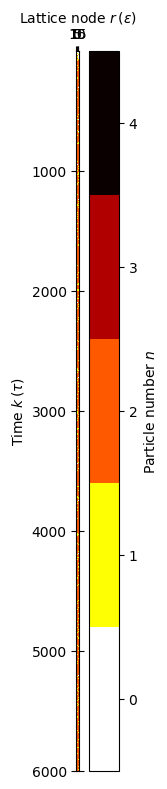

<Figure size 640x480 with 0 Axes>

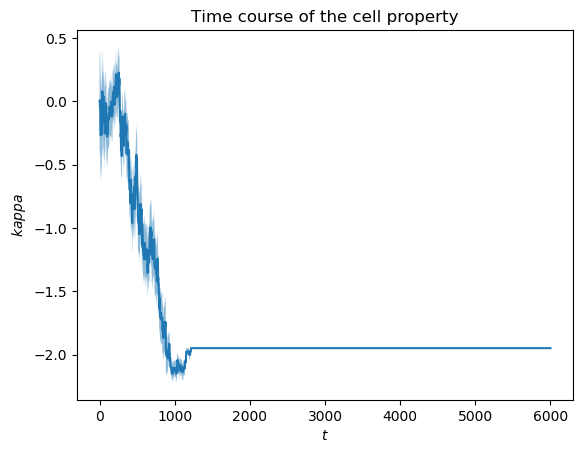

<Figure size 640x480 with 0 Axes>

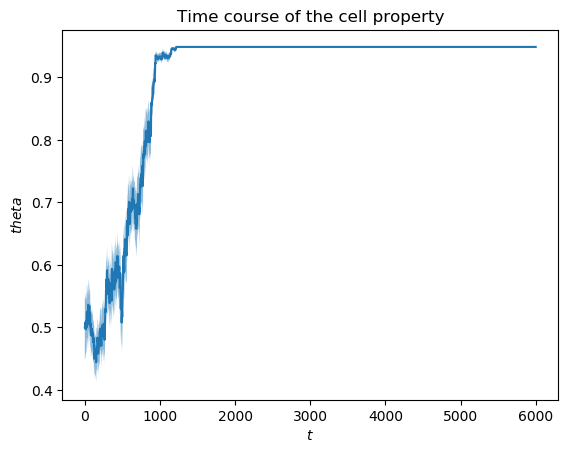

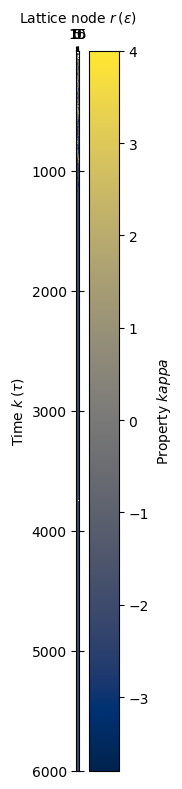

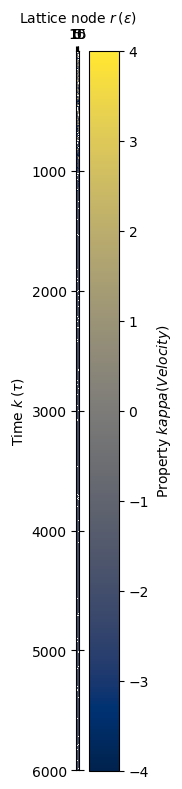

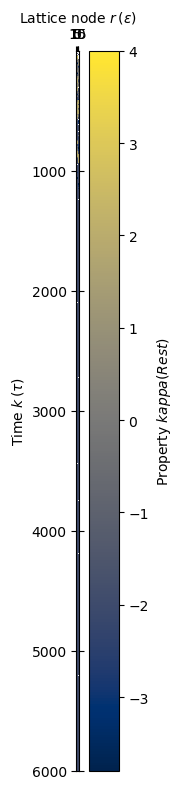

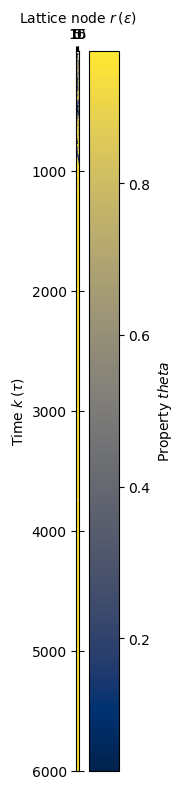

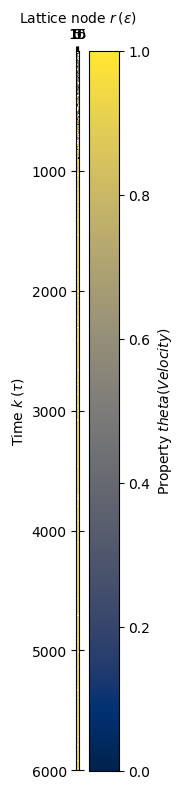

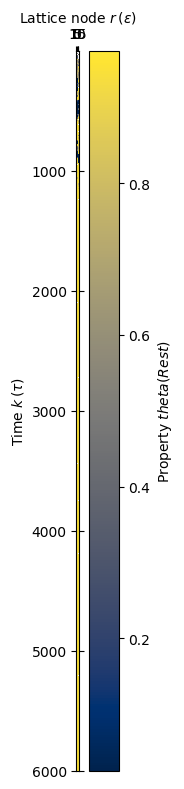

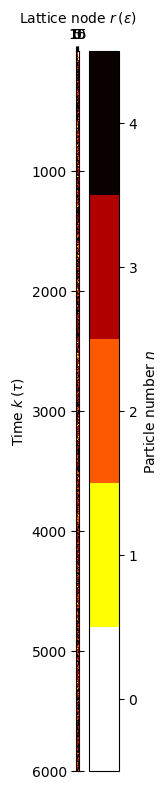

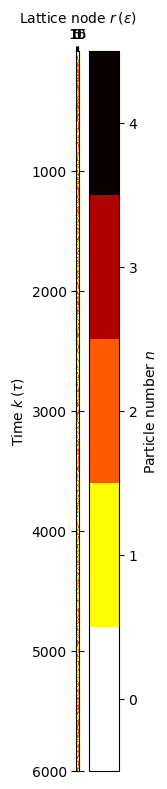

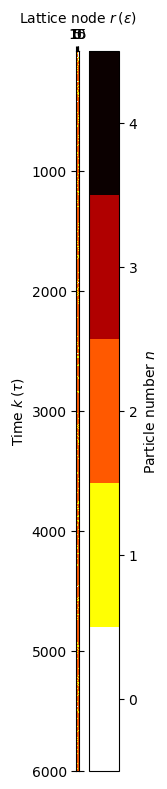

<Figure size 640x480 with 0 Axes>

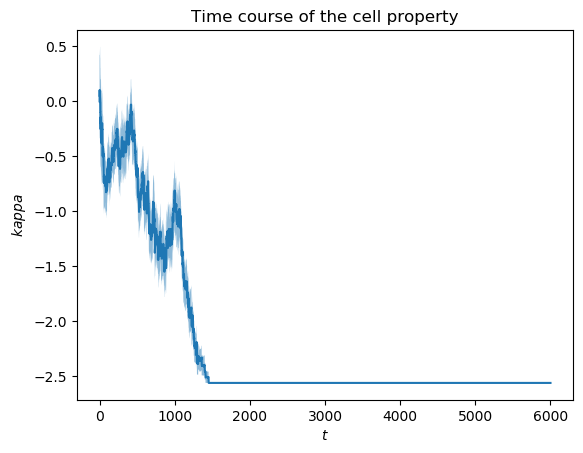

<Figure size 640x480 with 0 Axes>

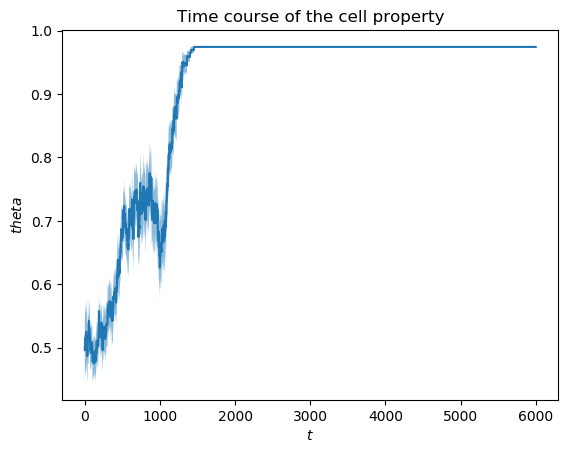

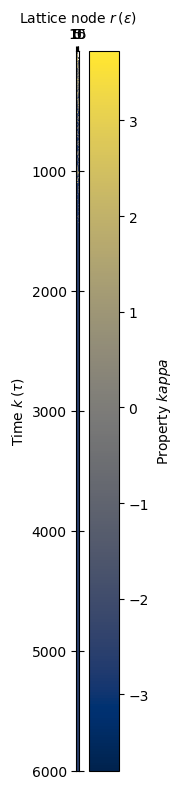

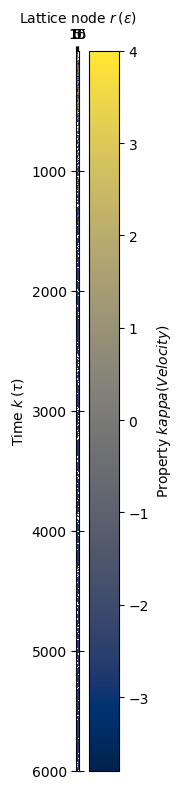

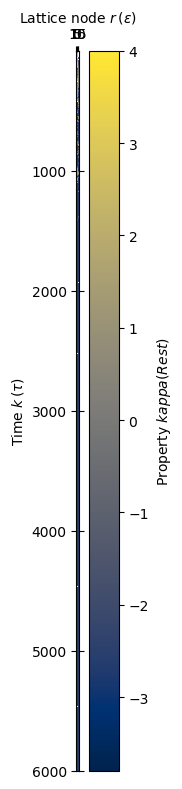

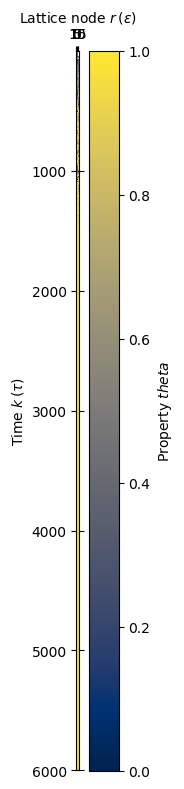

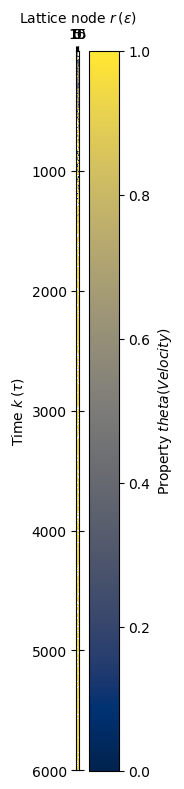

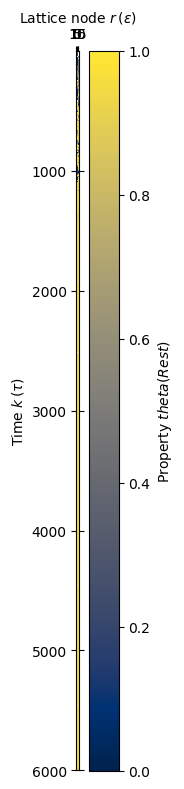

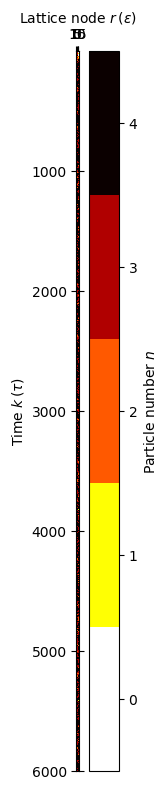

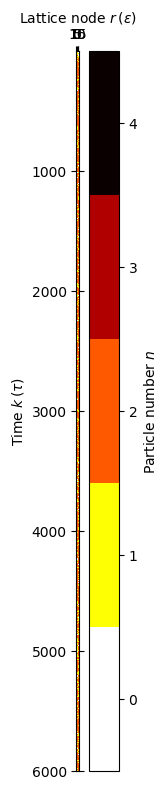

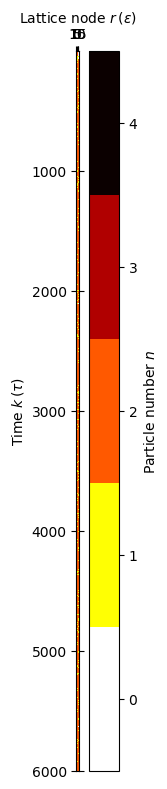

<Figure size 640x480 with 0 Axes>

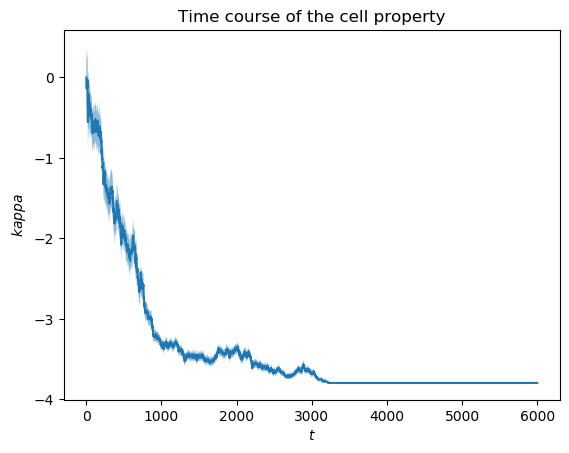

<Figure size 640x480 with 0 Axes>

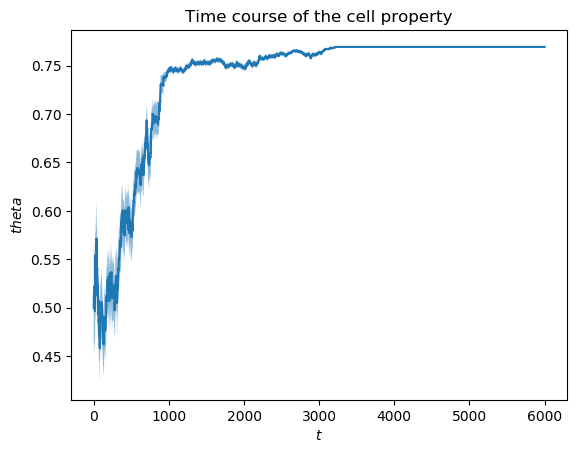

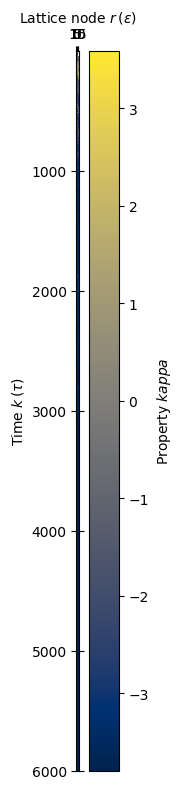

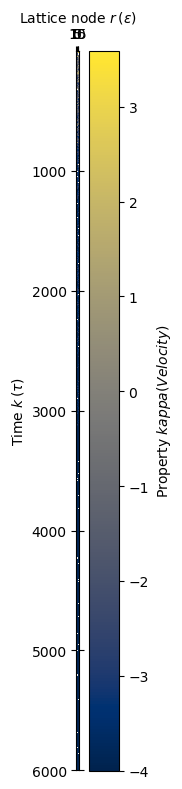

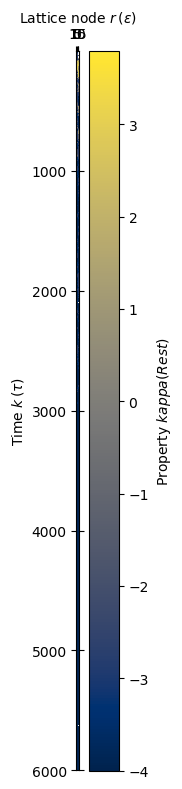

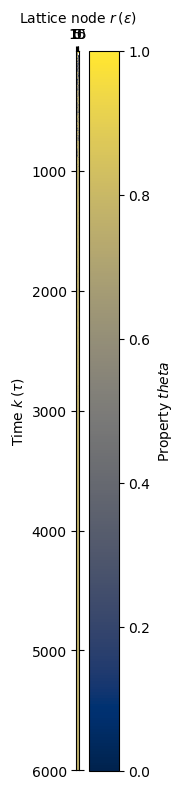

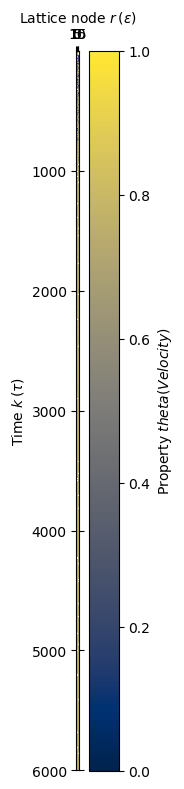

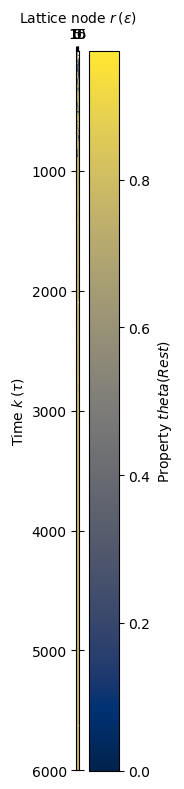

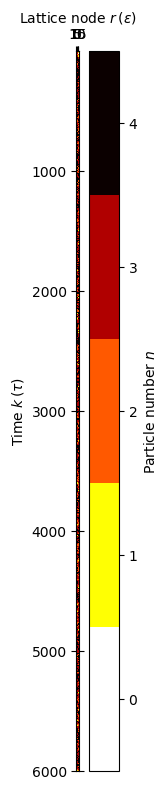

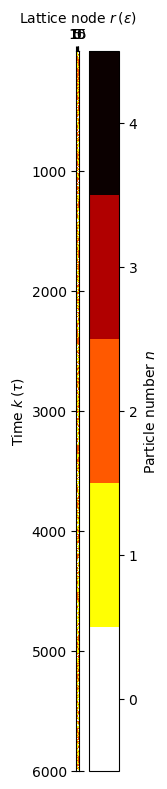

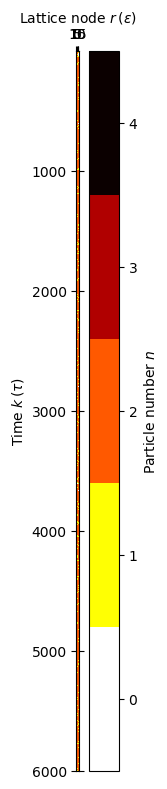

<Figure size 640x480 with 0 Axes>

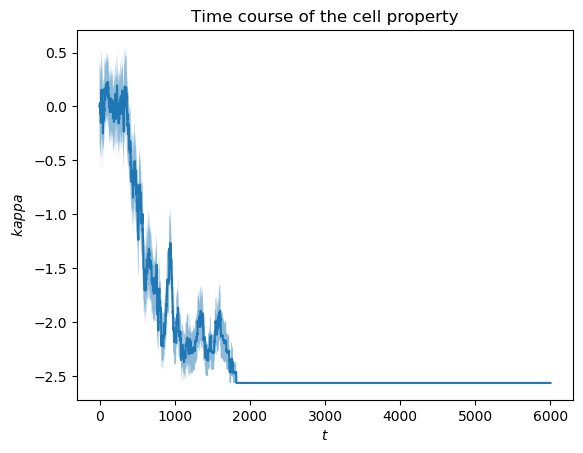

<Figure size 640x480 with 0 Axes>

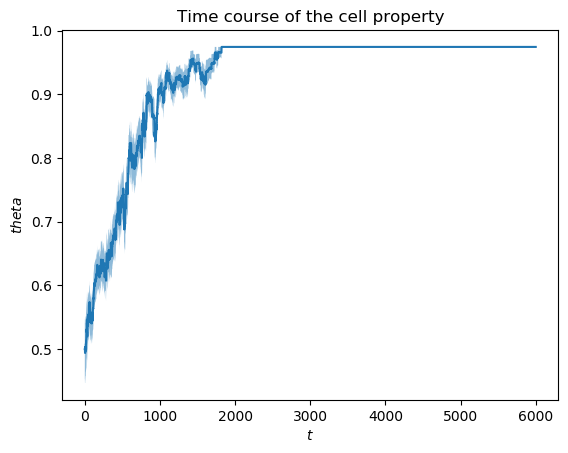

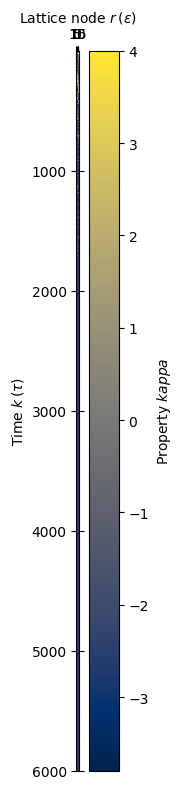

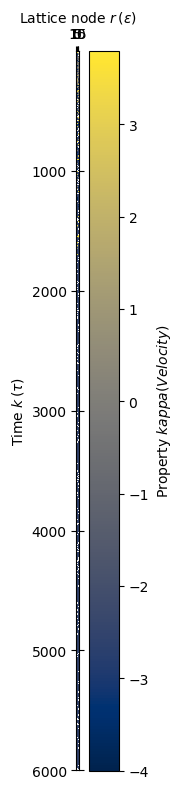

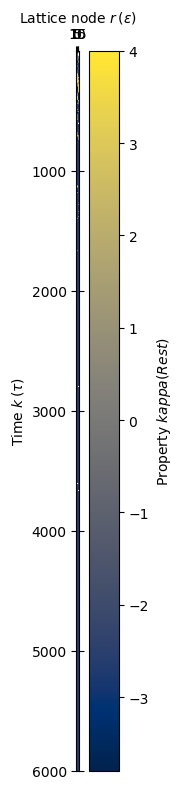

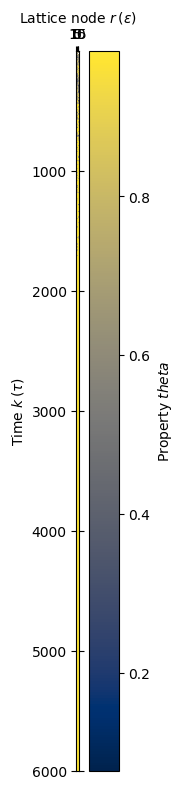

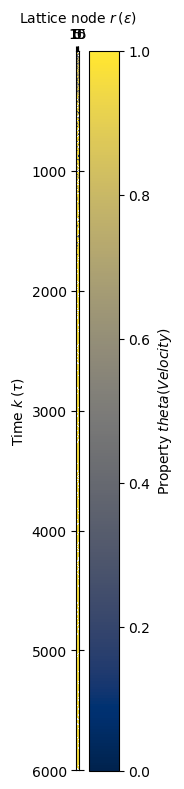

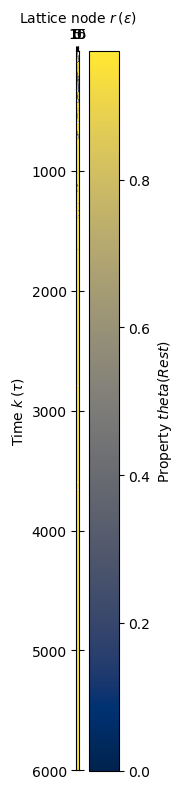

In [14]:
for run in range(Runs):
    run=run
    if not os.path.exists('Run %s/' %str(run+1)):
        os.makedirs('Run %s/' %str(run+1))
    lgca1 = get_lgca(ib=True, geometry = 'lin', bc = 'refl', interaction='go_or_grow', kappa=kappa, theta=theta, r_b=0.2, r_d=0.01, nodes=nodes, shift_nodes_left=True)
    lgca1.timeevo(timesteps=tmax, record=True, recordProp=True, recordN = True)
    
    
    kappa_t = lgca1.propkappa_t.reshape(tmax+1, l*n_channels, order='F')
    theta_t = lgca1.proptheta_t.reshape(tmax+1, l*n_channels, order='F')
    nodes_t = lgca1.nodes_t.reshape(tmax+1, l*n_channels, order='F')
    """
    WritePropertyTime(kappa_t, "Run " + str(run+1) + "/" + strID + "Evolution of Kappa", simulInfo)
    WritePropertyTime(theta_t, "Run " + str(run+1) + "/" + strID + "Evolution of Theta", simulInfo)
    WritePropertyTime(nodes_t, "Run " + str(run+1) + "/" + strID + "Evolution of Nodes", simulInfo)
    """
    plt.figure()
    lgca1.plot_density()
    plt.savefig("Run " + str(run+1) + "/" + strID + "density.jpg")
    plt.figure()
    lgca1.plot_density_channel(channel='velocity')
    plt.savefig("Run " + str(run+1) + "/" + strID + "densityVelocity.jpg")
    plt.figure()
    lgca1.plot_density_channel(channel='rest')
    plt.savefig("Run " + str(run+1) + "/" + strID + "densityRest.jpg")
    plt.figure()
    lgca1.plot_prop_timecourse(propname='kappa')
    plt.savefig("Run " + str(run+1) + "/" + strID + "meankappavariation.jpg")
    plt.figure()
    lgca1.plot_prop_timecourse(propname='theta')
    plt.savefig("Run " + str(run+1) + "/" + strID + "meanthetavariation.jpg")
    plt.figure()
    lgca1.plot_prop_spatial()
    plt.savefig("Run " + str(run+1) + "/" + strID + "kappaSpatial.jpg")
    plt.figure()
    lgca1.plot_prop_spatial(channeltype='velocity')
    plt.savefig("Run " + str(run+1) + "/" + strID + "kappaSpatialVelocity.jpg")
    plt.figure()
    lgca1.plot_prop_spatial(channeltype='rest')
    plt.savefig("Run " + str(run+1) + "/" + strID + 'kappaSpatialRest.jpg')
    plt.figure()
    lgca1.plot_prop_spatial(propname = 'theta')
    plt.savefig("Run " + str(run+1) + "/" + strID + "thetaSpatial.jpg")
    plt.figure()
    lgca1.plot_prop_spatial(propname = 'theta', channeltype='velocity')
    plt.savefig("Run " + str(run+1) + "/" + strID + "thetaSpatialVelocity.jpg")
    plt.figure()
    lgca1.plot_prop_spatial(propname = 'theta', channeltype='rest')
    plt.savefig("Run " + str(run+1) + "/" + strID + 'thetaSpatialRest.jpg')
    
    kappa_mean_t = lgca1.kappa_mean_t
    theta_mean_t = lgca1.theta_mean_t
    kappa_std_t = lgca1.kappa_std_t
    theta_std_t = lgca1.theta_std_t
    kappa_mean_vel_t = lgca1.kappa_mean_vel_t
    theta_mean_vel_t = lgca1.theta_mean_vel_t
    kappa_mean_rest_t = lgca1.kappa_mean_rest_t
    theta_mean_rest_t = lgca1.theta_mean_rest_t
    n_t = lgca1.n_t
    n_vel_t = lgca1.n_vel_t
    n_rest_t = lgca1.n_rest_t
    #saving tumour width and mean properties into arrays
    #Writing values to files
    WritePropertyMean(kappa_mean_t, "Run " + str(run+1) + "/" + strID +'Kappa Mean')
    WritePropertyMean(kappa_std_t, "Run " + str(run+1) + "/" + strID +'Kappa std')
    WritePropertyMean(theta_mean_t, "Run " + str(run+1) + "/" + strID +'Theta Mean')
    WritePropertyMean(theta_std_t, "Run " + str(run+1) + "/" + strID +'Theta std')
    WritePropertyMean(kappa_mean_vel_t, "Run " + str(run+1) + "/" + strID + 'Kappa Mean Vel')
    WritePropertyMean(theta_mean_vel_t, "Run " + str(run+1) + "/" + strID +'Theta Mean Vel')
    WritePropertyMean(kappa_mean_rest_t, "Run " + str(run+1) + "/" + strID + 'Kappa Mean Rest')
    WritePropertyMean(theta_mean_rest_t, "Run " + str(run+1) + "/" + strID + 'Theta Mean Rest')
    
    end_record_time = 100
    jump_time = 50
    WritePropertyTimeFrom(kappa_t, "Run " + str(run+1) + "/" + strID + "Evolution of Kappa from " + str(tmax-end_record_time), tmax-end_record_time, simulInfo)
    WritePropertyTimeStaggered(kappa_t, "Run " + str(run+1) + "/" + strID + "Evolution of Kappa staggered by " + str(jump_time), jump_time, simulInfo)
    WritePropertyTimeFrom(theta_t, "Run " + str(run+1) + "/" + strID + "Evolution of Theta from " + str(tmax-end_record_time), tmax-end_record_time, simulInfo)
    WritePropertyTimeStaggered(theta_t, "Run " + str(run+1) + "/" + strID + "Evolution of Theta staggered by " + str(jump_time), jump_time, simulInfo)
    WritePropertyTimeFrom(nodes_t, "Run " + str(run+1) + "/" + strID + "Evolution of Nodes from " + str(tmax-end_record_time), tmax-end_record_time, simulInfo)
    WritePropertyTimeStaggered(nodes_t, "Run " + str(run+1) + "/" + strID + "Evolution of Nodes staggered by " + str(jump_time), jump_time, simulInfo)
    
    WritePropertyTimeFrom(kappa_t, "Run " + str(run+1) + "/" + strID + "Final Kappa", tmax, simulInfo)
    WritePropertyTimeFrom(theta_t, "Run " + str(run+1) + "/" + strID + "Final Theta" , tmax, simulInfo)
    WritePropertyTimeFrom(nodes_t, "Run " + str(run+1) + "/" + strID + "Final Nodes", tmax, simulInfo)
    
    
    
    WritePropertyMean(n_t, "Run " + str(run+1) + "/" + strID +'Total Cells')
    WritePropertyMean(n_vel_t, "Run " + str(run+1) + "/" + strID +'Migratory Cells')
    WritePropertyMean(n_rest_t, "Run " + str(run+1) + "/" + strID +'Proliferative Cells')
    del lgca1